**Análise de dados do dataset "Laptop_Price", pode ser encontrado no kaggle.**

In [12]:
import pandas as pd

# loading
path = r'C:\Users\Leoni\Desktop\estudos\source\dados\Laptop_price.csv'

df = pd.read_csv(path)

df.head()


,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,Asus,3.830296,16,512,11.185147,2.641094,17395.093065
1,Acer,2.912833,4,1000,11.311372,3.260012,31607.605919
2,Lenovo,3.241627,4,256,11.853023,2.029061,9291.023542
3,Acer,3.806248,16,512,12.280360,4.573865,17436.728334
4,Acer,3.268097,32,1000,14.990877,4.193472,32917.990718


In [13]:
df.columns = df.columns.str.lower()

df.tail()

,brand,processor_speed,ram_size,storage_capacity,screen_size,weight,price
995,HP,3.343584,4,1000,12.587095,3.162399,31593.668017
996,Dell,2.780555,8,256,12.679356,3.750265,9149.521832
997,Dell,3.200569,4,512,12.666315,3.392612,16552.404779
998,Asus,1.604182,8,256,11.215581,3.857613,9407.473459
999,Lenovo,1.711980,4,256,16.561498,3.440883,8807.696702


In [14]:
summary_stats = df.describe()
print(summary_stats)

       processor_speed     ram_size  storage_capacity  screen_size  \
count      1000.000000  1000.000000       1000.000000  1000.000000   
mean          2.750611    15.500000        584.576000    14.056790   
std           0.731796    10.988665        313.438517     1.705882   
min           1.511580     4.000000        256.000000    11.012111   
25%           2.089246     8.000000        256.000000    12.635523   
50%           2.760885    16.000000        512.000000    14.099643   
75%           3.362610    32.000000       1000.000000    15.528590   
max           3.998534    32.000000       1000.000000    16.985737   

            weight         price  
count  1000.000000   1000.000000  
mean      3.466919  19604.187963  
std       0.866541   9406.064880  
min       2.000560   8570.012950  
25%       2.717211  10114.012948  
50%       3.464630  17287.241878  
75%       4.212583  31566.214754  
max       4.990728  33503.935037  


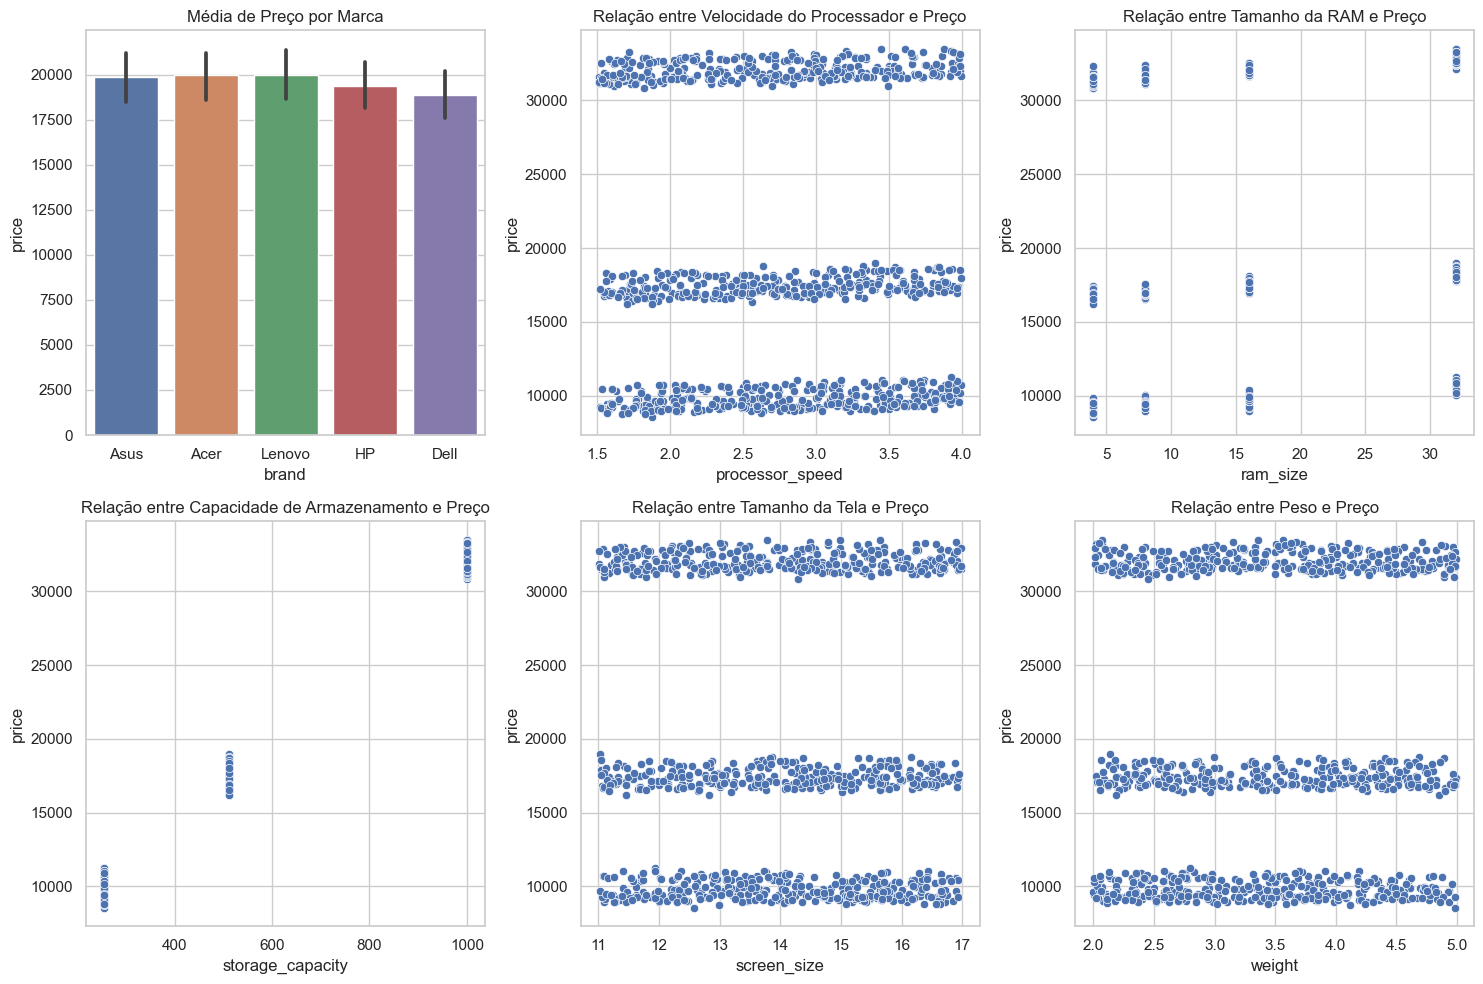

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Gráfico de barras para estudar a relação entre a marca e o preço
sns.barplot(x='brand', y='price', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Média de Preço por Marca')

# Gráfico de dispersão para a relação entre a velocidade do processador e o preço
sns.scatterplot(x='processor_speed', y='price', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Relação entre Velocidade do Processador e Preço')

# Gráfico de dispersão para a relação entre o tamanho da RAM e o preço
sns.scatterplot(x='ram_size', y='price', data=df, ax=axes[0, 2])
axes[0, 2].set_title('Relação entre Tamanho da RAM e Preço')

# Gráfico de dispersão para a relação entre a capacidade de armazenamento e o preço
sns.scatterplot(x='storage_capacity', y='price', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Relação entre Capacidade de Armazenamento e Preço')

# Gráfico de dispersão para a relação entre o tamanho da tela e o preço
sns.scatterplot(x='screen_size', y='price', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Relação entre Tamanho da Tela e Preço')

# Gráfico de dispersão para a relação entre o peso e o preço
sns.scatterplot(x='weight', y='price', data=df, ax=axes[1, 2])
axes[1, 2].set_title('Relação entre Peso e Preço')


plt.tight_layout()
plt.show()


In [25]:
# Normalizando as colunas para que os pesos se apliquem de maneira uniforme
df_normalized = df.copy()
df_normalized[['processor_speed', 'ram_size', 'storage_capacity', 'screen_size', 'weight', 'price']] = df[['processor_speed', 'ram_size', 'storage_capacity', 'screen_size', 'weight', 'price']] / df[['processor_speed', 'ram_size', 'storage_capacity', 'screen_size', 'weight', 'price']].max()

# Definindo pesos
weights = {
    'ram_size': 0.25,
    'storage_capacity': 0.10,
    'processor_speed': 0.25,
    'screen_size': 0.15,
    'weight': -0.1,
    'price': -0.25
}

# Calculando a pontuação para cada laptop
df_normalized['Score'] = df_normalized['ram_size'] * weights['ram_size'] + \
                        df_normalized['storage_capacity'] * weights['storage_capacity'] + \
                        df_normalized['processor_speed'] * weights['processor_speed'] + \
                        df_normalized['screen_size'] * weights['screen_size'] + \
                        df_normalized['weight'] * weights['weight'] + \
                        df_normalized['price'] * weights['price']

# Ordenando os laptops pela pontuação em ordem decrescente
top_100_laptops = df_normalized.sort_values(by='Score', ascending=False).head(100)

# Obtendo os top 100 laptops do DataFrame original
top_100_laptops = df.loc[top_100_laptops.index]

print(top_100_laptops)

      brand  processor_speed  ram_size  storage_capacity  screen_size  \
427    Acer         3.859040        32               256    16.330785   
648    Dell         3.670356        32               256    16.419145   
17     Acer         3.802105        32               256    15.693028   
215  Lenovo         3.969170        32               256    14.098546   
254    Dell         3.686754        32               256    15.331575   
..      ...              ...       ...               ...          ...   
991  Lenovo         3.034834        32               256    12.409966   
574    Acer         3.928488        32              1000    14.783486   
110    Dell         3.543609        32               512    14.381960   
936    Dell         2.817604        32               512    13.663423   
430      HP         2.493986        32               256    16.148722   

       weight         price  
427  2.774312  10483.978627  
648  2.429484  10521.560806  
17   2.395896  10915.057173  
215

In [26]:
top_100_laptops['Rank'] = range(1, 101)

In [27]:
top_100_laptops.head(40)

,brand,processor_speed,ram_size,storage_capacity,screen_size,weight,price,Rank
427,Acer,3.859040,32,256,16.330785,2.774312,10483.978627,1
648,Dell,3.670356,32,256,16.419145,2.429484,10521.560806,2
17,Acer,3.802105,32,256,15.693028,2.395896,10915.057173,3
215,Lenovo,3.969170,32,256,14.098546,2.262950,10901.062546,4
254,Dell,3.686754,32,256,15.331575,2.200082,10405.951435,5
528,Acer,3.939663,32,256,14.564497,2.763622,10638.502443,6
845,Acer,3.605083,32,256,15.761424,2.128219,10966.959226,7
258,HP,3.994835,32,256,15.443757,3.569639,10697.836784,8
325,Dell,3.889129,32,256,13.906067,2.644750,10742.170263,9
393,Dell,3.270430,32,256,16.211838,2.043701,10410.688019,10


## Método de Classificação Ponderada para Seleção dos "Top 100" Laptops

Utilizei uma abordagem de classificação ponderada para selecionar os "Top 100" laptops com base em características específicas. As características incluem a quantidade de RAM, capacidade de armazenamento, velocidade do processador, tamanho da tela, peso e preço.

### Fórmula de Pontuação
A pontuação de cada laptop é calculada como a soma ponderada das características normalizadas, usando pesos atribuídos manualmente. A fórmula é:

>> Score=ram_size×weight+storage_capacity×weight+processor_speed×weight+screen_size×weight+weight×weight+price×weight

### Resultados
Os laptops são classificados com base nessas pontuações, e os "Top 100" são selecionados com as pontuações mais altas. Esta abordagem permite a personalização das prioridades, destacando laptops com características consideradas mais importantes pelos pesos atribuídos.

